In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as datetime
from sklearn import preprocessing as pp

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv(os.path.join(dirname, filename))

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [50]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [52]:
# 01 
# A) Quantas compras foram registradas nesta base? 
# B) Qual a quantidade de compras que foi feita por mulheres?
# C) Qual filial teve uma maior quantidade de vendas efetuadas ?

# 01 - A
num_compras = df['Invoice ID'].nunique()
print('Número total de compras: {}'.format(num_compras))

# 02 - B
female_df = df.loc[(df.Gender == 'Female')]
female_count = len(female_df)
print("Número de compras feitas por mulheres: {}".format(female_count))

# 03 - C
branch_df = df['Branch'].value_counts()
print("A filial que teve a maior quantidade de vendas efetuadas foi: '{}', com {}".format(branch_df.idxmax(), branch_df.max()))


Número total de compras: 1000
Número de compras feitas por mulheres: 501
A filial que teve a maior quantidade de vendas efetuadas foi: 'A', com 340


In [53]:
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [54]:
# 02
# • Qual a filial em que as mulheres fizeram mais compras que os homens?
# • Qual o valor médio de compras realizadas por membros na cidade de Mandalay?
# • Elabore um gráfico de barras mostrando o total valor total de pagamentos realizados em cada filial, diferenciando o tipo de pagamento. Podemos afirmar que há um meio de pagamento preferido pelos clientes da rede de supermercados?

In [55]:
# 02 - A
df[df.Gender == 'Female']['Branch'].value_counts() - df[df.Gender == 'Male']['Branch'].value_counts()

A   -18
B    -8
C    28
Name: Branch, dtype: int64

In [56]:
# 02 - B
mandalay_avg = df[(df["Customer type"] == "Member") & (df["City"] == "Mandalay")].groupby(['City']).mean()
mandalay_avg['cogs']

City
Mandalay    309.983758
Name: cogs, dtype: float64

# 02 - C
# Baseado-se nas informações dos gráficos, pode-se afirmar que a forma de pagamento preferido pelos clientes é dinheiro. 

<AxesSubplot:xlabel='Branch'>

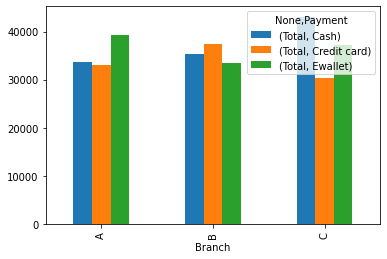

In [57]:
# 02 - C
df[['Branch', 'Total', 'Payment']].groupby(['Branch', 'Payment']).sum().unstack().plot.bar()

<AxesSubplot:xlabel='Payment'>

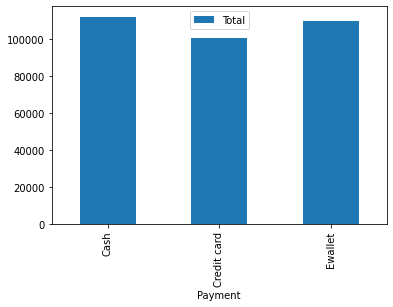

In [58]:
df[['Total', 'Payment']].groupby(['Payment']).sum().plot.bar()

In [59]:
# 03
# • Há outliers no valor total de compras realizadas?
# • Elabore um gráfico de boxplot com o valor das vendas de cada filial
# • Elabore um gráfico de linha que ilustra o valor total de vendas de acordo com a hora do dia. Há um horário que os clientes costumam gastar mais?


# 03 - A
# Sim, há outliers de acordo com as definições de outliers da biblioteca pandas. 
# 1.5 * Q3 - Q1

<AxesSubplot:>

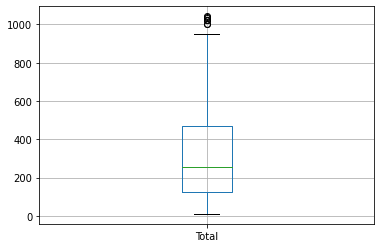

In [60]:
# 03 - A

df.boxplot(column='Total')

<AxesSubplot:title={'center':'Total'}, xlabel='[Branch]'>

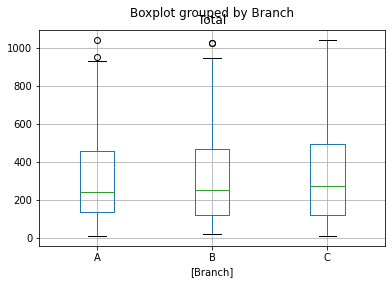

In [61]:
# 03 - B
df[['Branch', 'Total']].boxplot(by='Branch')

# 03 - C 
# Com base nas informações do gráfico, os clientes costumam gastar mais entre as 20:00 e 20:59 

<AxesSubplot:xlabel='Time'>

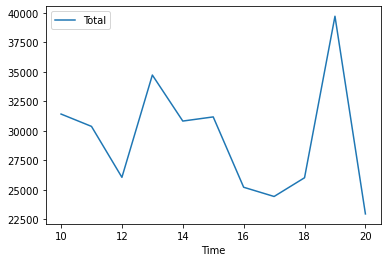

In [62]:
# 03 - C
df['Time'] = pd.to_datetime(df['Time']) 
df[['Time', 'Total']].groupby(df['Time'].dt.hour).sum().plot()

In [66]:
# 04
# • Utilizando uma matriz de correlação com todos os dados de compra da base. É possível identificar algum fator que interfira diretamente no índice de satisfação?
# • O índice de satisfação é maior entre os membros ou não membros? Para justificar a sua resposta verifique qual grupo apresenta menor variabilidade neste indicador.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   int64         
 2   City                     1000 non-null   int64         
 3   Customer type            1000 non-null   int64         
 4   Gender                   1000 non-null   int64         
 5   Product line             1000 non-null   int64         
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   object        
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

# 04 - A
# Não, não tem nenhum fator que interfira DIRETAMENTE com o índice de satifação.

In [64]:
# 04 - A
df[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']] = df[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']].apply(pp.LabelEncoder().fit_transform)
#df['Customer_type_dummy'] = pd.Categorical()
#df = pd.concat([df, pd.Categorical(df['Customer type'])], axis=1)
df.corr()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
Branch,1.000000,-0.507401,-0.019608,-0.056318,-0.053938,0.028202,0.015964,0.041047,0.041047,-0.050104,0.041047,NaN,0.041047,0.010238
City,-0.507401,1.000000,0.004899,0.012219,0.008811,-0.013763,-0.002121,-0.012812,-0.012812,0.019094,-0.012812,NaN,-0.012812,0.049585
Customer type,-0.019608,0.004899,1.000000,0.039996,-0.036800,-0.020238,-0.016763,-0.019670,-0.019670,0.018073,-0.019670,NaN,-0.019670,0.018889
Gender,-0.056318,0.012219,0.039996,1.000000,0.005193,0.015445,-0.074258,-0.049451,-0.049451,0.044578,-0.049451,NaN,-0.049451,0.004800
Product line,-0.053938,0.008811,-0.036800,0.005193,1.000000,0.019321,0.020256,0.031621,0.031621,0.029896,0.031621,NaN,0.031621,-0.020529
Unit price,0.028202,-0.013763,-0.020238,0.015445,0.019321,1.000000,0.010778,0.633962,0.633962,-0.015941,0.633962,NaN,0.633962,-0.008778
Quantity,0.015964,-0.002121,-0.016763,-0.074258,0.020256,0.010778,1.000000,0.705510,0.705510,-0.003921,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.041047,-0.012812,-0.019670,-0.049451,0.031621,0.633962,0.705510,1.000000,1.000000,-0.012434,1.000000,NaN,1.000000,-0.036442
Total,0.041047,-0.012812,-0.019670,-0.049451,0.031621,0.633962,0.705510,1.000000,1.000000,-0.012434,1.000000,NaN,1.000000,-0.036442
Payment,-0.050104,0.019094,0.018073,0.044578,0.029896,-0.015941,-0.003921,-0.012434,-0.012434,1.000000,-0.012434,NaN,-0.012434,-0.005381


# 04 - B
# Ambos valores são próximos em desvio padrão e média. 

In [65]:
# 04 - B
df[['Rating', 'Customer type']].groupby('Customer type').describe()

Rating                                              
               count      mean       std  min  25%  50%  75%   max
Customer type                                                     
0              501.0  6.940319  1.749380  4.0  5.4  7.0  8.5  10.0
1              499.0  7.005210  1.688222  4.0  5.7  7.0  8.4  10.0